In this notebook we will apply `TableAutomization.py` file to six modal distribution.

### Importing the needed libraries 

In [2]:
import cuqi
import numpy as np
import os
import sys
sys.path.append(os.path.abspath('..'))
import utilities 
import benchmarksClass as BC 


# The six modal distribution


The given probability density function is:

$\pi(x,y) \propto \exp\left(-\frac{x^2}{2}\right) \exp\left(\frac{-(\csc^5(y) - x)^2}{2}\right) \quad (-10< x,y < 10)$

 Gradient of the log-pdf


$\nabla \log \pi(x, y) = \left(\csc^5(y) - 2x, \; 5 (\csc^5(y) - x) \csc^5(y) \cot(y)\right)$

In [3]:

target_sixmodal =BC.Sixmodal()

### Plotting the "sixmodal"

/app/CUQIpy-Benchmarks/benchmarksClass/_sixmodal.py:11: RuntimeWarning: divide by zero encountered in scalar power
  return (- x[0]**2 - ((np.sin(x[1]))**(-5) - x[0])**2)/2


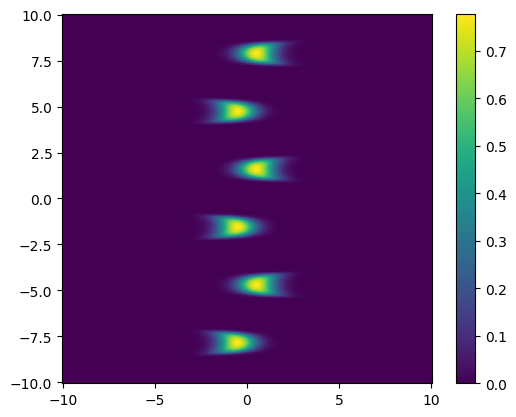

In [4]:
utilities.Plot(target_sixmodal).plot_pdf_2D(-10, 10, -10, 10,N2=201)

## Example 



In this example, We used a fixed inital point in a high density area. Note that we used smaller sample size for NUTS to reduce the comuptational cost.


In [5]:
samples = utilities.MCMCComparison(target_sixmodal, scale = [1,1,0.1,0.3,0.05], Ns = [8500,8500,8500,8500,850], Nb = [1500,1500,1500,1500,150], x0 = np.array([1,2]), seed = 12,chains=1,selected_criteria= ["ESS", "AR", "LogPDF", "Gradient","Rhat"], selected_methods =["MH_fixed", "CWMH", "ULA", "MALA", "NUTS"])

In [5]:
samples.create_comparison()

+----------+---------+----------+-------+---------+----------+-------+----------+----------+
|  Method  | Samples | Burn-ins | Scale | ESS(v0) | ESS(v1)  |   AR  |  LogPDF  | Gradient |
+----------+---------+----------+-------+---------+----------+-------+----------+----------+
| MH_fixed |   8500  |   1500   |  1.0  |  84.698 |   7.0    |  0.25 |  10000   |    0     |
|   CWMH   |   8500  |   1500   |  1.0  | 106.154 |  9.005   | 0.609 |  19999   |    0     |
|   ULA    |   8500  |   1500   |  0.1  |  43.222 |  43.22   |  1.0  |  10000   |  10000   |
|   MALA   |   8500  |   1500   |  0.3  | 800.092 | 1428.621 | 0.489 |  10000   |  10000   |
|   NUTS   |   850   |   150    |   -   |  49.12  |  90.507  |  1.0  | 57837660 | 57837660 |
+----------+---------+----------+-------+---------+----------+-------+----------+----------+


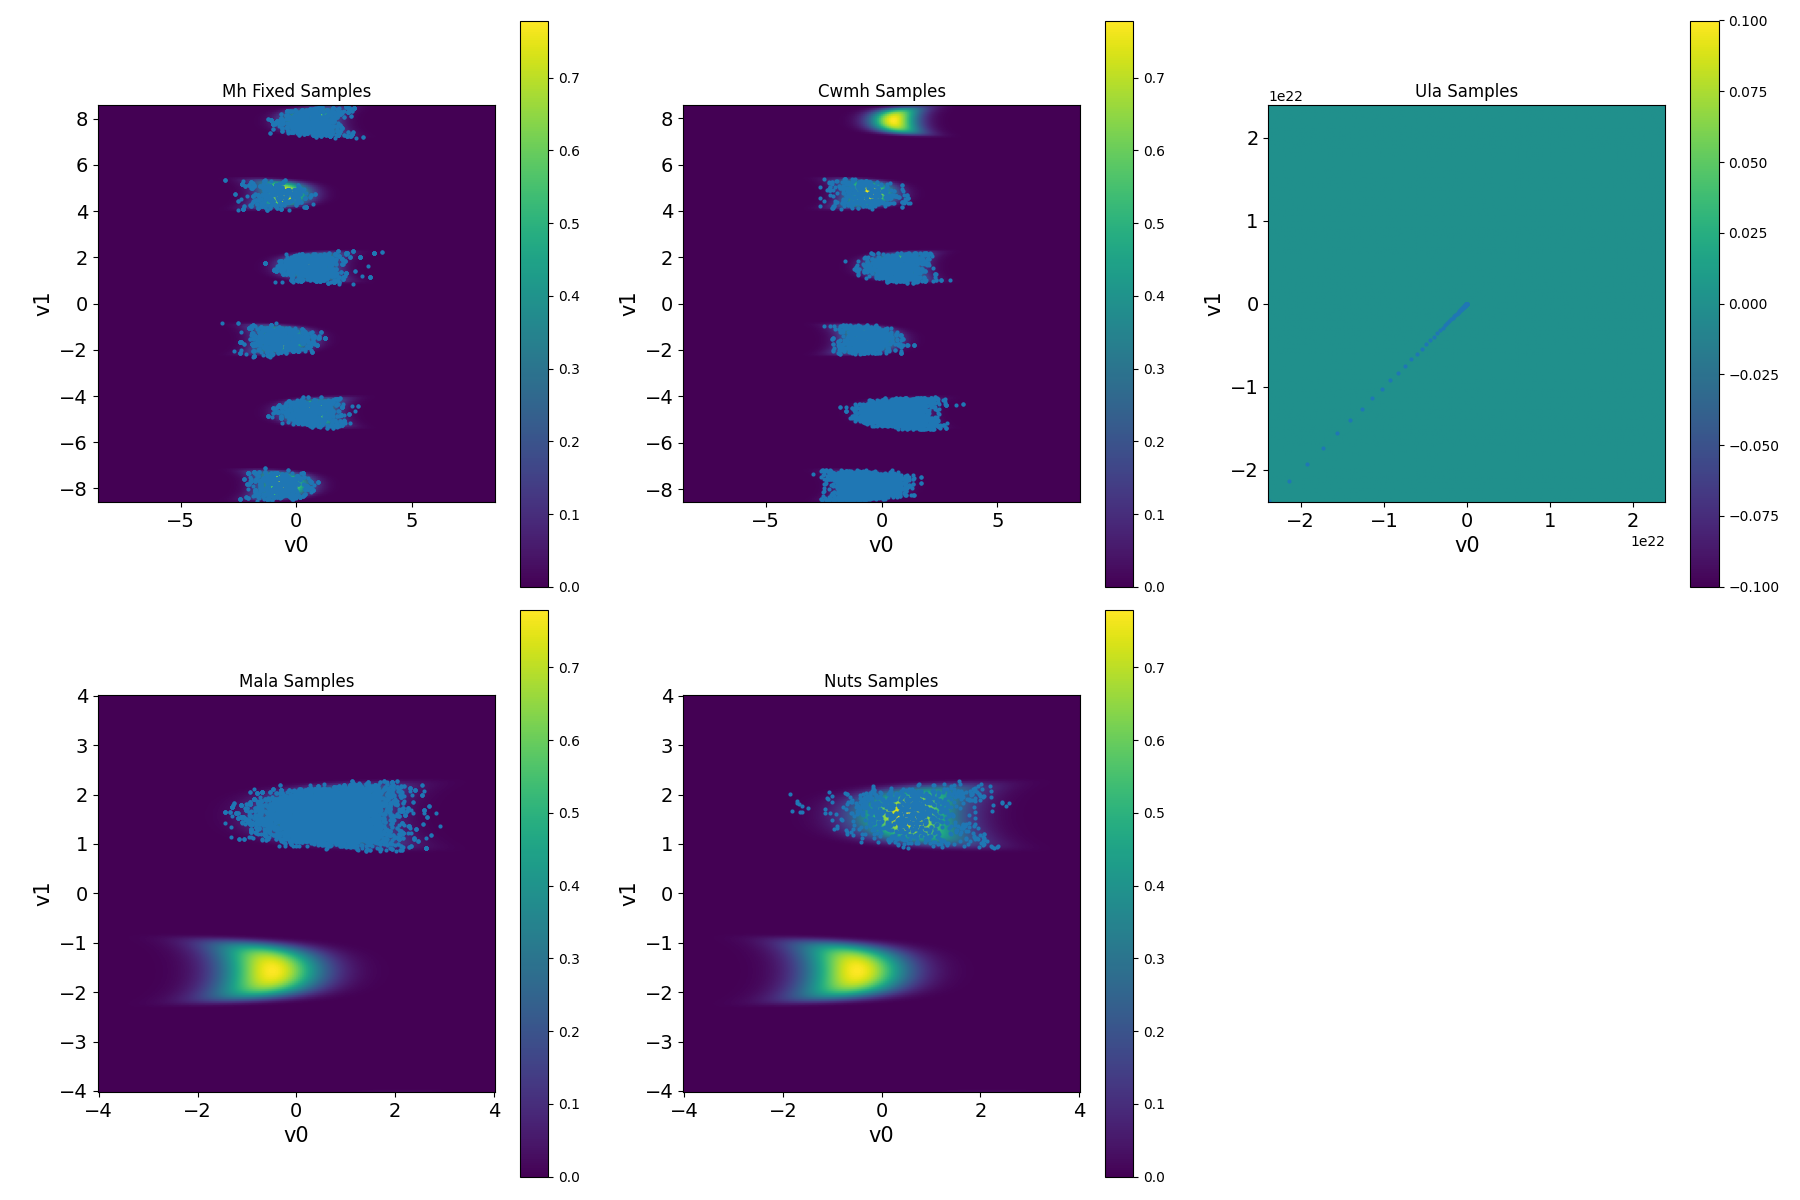

In [6]:
samples.create_comparison()

### observation
- MH perfomrs well.
- Gradient based sampling stuck in a local high-density area.
- Ula samplped from wrong areas.


## Second Example

In [1]:
import cuqi
import numpy as np
import os
import sys
sys.path.append(os.path.abspath('..'))
from utilities import TableAutomization as TA
import benchmarksClass as BC 


In [3]:
target_sixmodal =BC.Sixmodal()

In [4]:
true_mu = np.array([0, 0])
true_sigma = np.array([1,1])
y = cuqi.distribution.Gaussian(mean=true_mu, cov=true_sigma**2)

In [5]:
samples2 = utilities.MCMCComparison(target_sixmodal, scale = [1,0.3,0.05], Ns = [8500,8500,8500,8500,8500], Nb = [1500,1500,1500,1500,1500], x0 = y, seed = 12,chains=3,selected_criteria= ["ESS", "AR", "LogPDF", "Gradient","Rhat"], selected_methods =["MH_fixed", "MALA", "NUTS"])

Sample 10000 / 10000

Average acceptance rate: 0.24764705882352941 

Sample 10000 / 10000


/Users/naoki/Desktop/CUQIpy_project/CUQIpy/cuqi/experimental/mcmc/_sampler.py:13: UserWarning: Module mcmc: tqdm not found. Install tqdm to get sampling progress.
  warnings.warn("Module mcmc: tqdm not found. Install tqdm to get sampling progress.")


Sample 10000 / 10000

Average acceptance rate: 0.2644705882352941 

Sample 10000 / 10000


/Users/naoki/Desktop/CUQIpy_project/CUQIpy/cuqi/experimental/mcmc/_sampler.py:13: UserWarning: Module mcmc: tqdm not found. Install tqdm to get sampling progress.
  warnings.warn("Module mcmc: tqdm not found. Install tqdm to get sampling progress.")


Sample 10000 / 10000

Average acceptance rate: 0.2585882352941177 

Sample 10000 / 10000


/Users/naoki/Desktop/CUQIpy_project/CUQIpy-Benchmarks/benchmarksClass/_sixmodal.py:11: RuntimeWarning: divide by zero encountered in scalar power
  return (- x[0]**2 - ((np.sin(x[1]))**(-5) - x[0])**2)/2


In [6]:
samples2.create_comparison()

+----------+---------+----------+-------+---------+---------+-------+---------+----------+----------+----------+
|  Method  | Samples | Burn-ins | Scale | ESS(v0) | ESS(v1) |   AR  |  LogPDF | Gradient | Rhat(v0) | Rhat(v1) |
+----------+---------+----------+-------+---------+---------+-------+---------+----------+----------+----------+
| MH_fixed |   8500  |   1500   |  1.0  |  72.29  |  5.572  | 0.248 |  10000  |    0     |  1.018   |  1.132   |
|   MALA   |   8500  |   1500   |  0.3  |  2.556  |  1.884  | 0.492 |  10000  |  10000   |  1.281   |  2.638   |
|   NUTS   |   8500  |   1500   |   -   | 449.465 | 248.974 | 0.987 | 1690971 | 1690971  |   1.25   |   1.45   |
+----------+---------+----------+-------+---------+---------+-------+---------+----------+----------+----------+


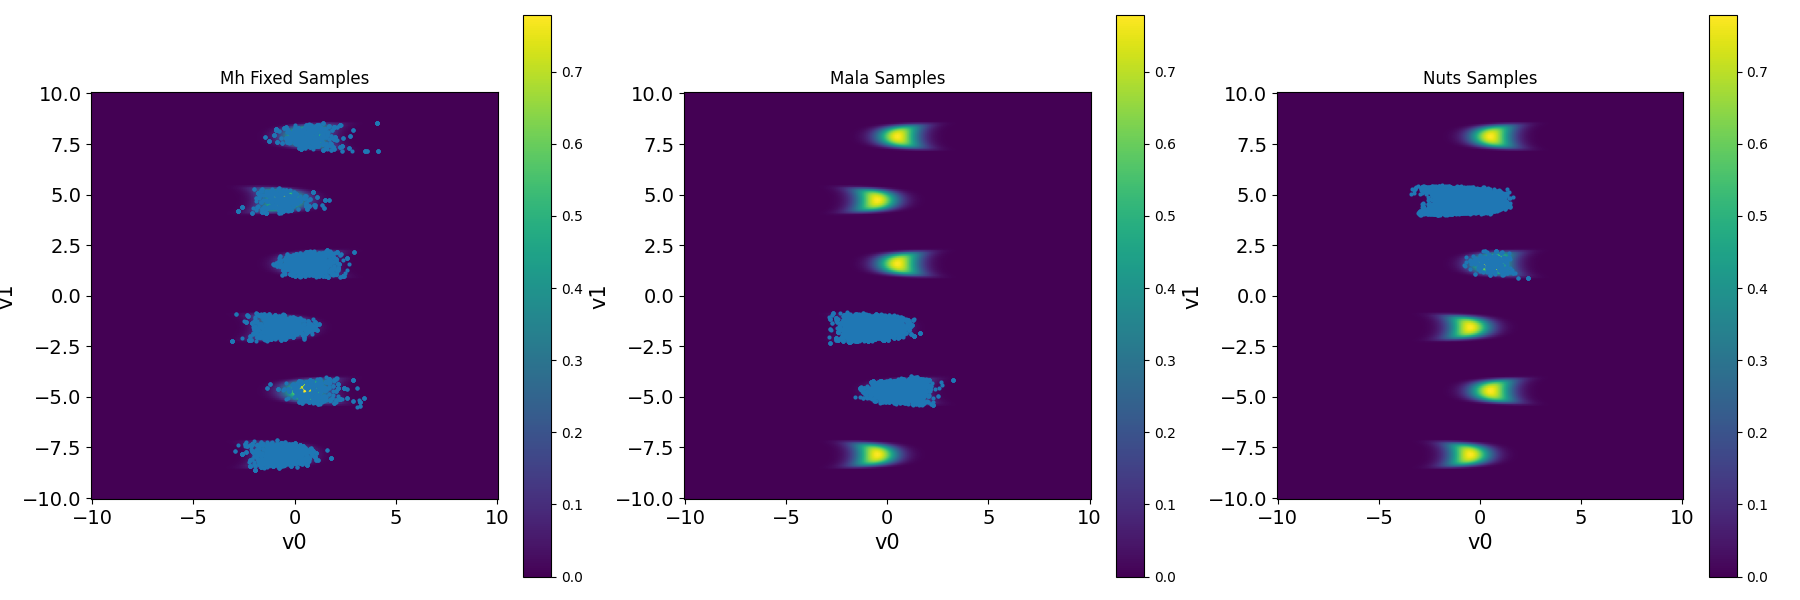

In [7]:
samples2.create_comparison()